In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import sklearn.datasets as dta
import scipy.stats as st

from census import Census
import gmaps
import csv

# Census & gmaps API Keys
from api_keys_census import (census_api, gkey)
c = Census(census_api, year=2020)

# Configure gmaps
gmaps.configure(api_key=gkey)

# State FIPS codes
# This is where you're going to import the FIPS codes from States.csv
states_df = pd.read_csv('resources/States.csv')

In [2]:
# 60637:University of Chicago
# 10027:Colombia University
# 60201:Northwestern University
# 10012:NYU
# 90007:USC
# 19104:University of Pennsylvania
# 27701:Duke
# 63130:Washington University
# 10458:Fordham University
# 91103:California Institute of Technology

In [3]:
#c_variablesLink = "http://api.census.gov/data/2020/acs/acs5/variables.json"
#variablesData = requests.get(c_variablesLink).json()
#variables_pd = pd.DataFrame(variablesData)
# print(variables_pd)
#variables_pd.to_csv('variabledata.csv')

In [4]:
# print(states_df.loc("code",0))

# print (states_df.query('Code" == "0"')["Abbreviation"])
# states_df.query('Code == 1')['Abbreviation']

# states_df


In [5]:
Universities = {'University':['University of Chicago','Colombia University','Northwestern University','NYU','USC','University of Pennsylvania','Duke','Washington University','Fordham University','California Institute of Technology'],
                'Zip Code':[60637, 10027, 60201, 10012, 90007, 19104, 27701, 63130, 10458, 91103],
                'Lat':[41.780393, 40.812908, 42.056292, 40.725568, 34.02654, 39.964046, 35.995918, 38.665788, 40.864942, 34.167659],
                'Lng':[-87.596954, -73.953194, -87.701609, -73.998208, -118.282786, -75.197184, -78.902135, -90.32224, -73.884878, -118.169566]}
Universities_df = pd.DataFrame(Universities)
Universities_df.dtypes

Universities_df

,University,Zip Code,Lat,Lng
0,University of Chicago,60637,41.780393,-87.596954
1,Colombia University,10027,40.812908,-73.953194
2,Northwestern University,60201,42.056292,-87.701609
3,NYU,10012,40.725568,-73.998208
4,USC,90007,34.026540,-118.282786
5,University of Pennsylvania,19104,39.964046,-75.197184
6,Duke,27701,35.995918,-78.902135
7,Washington University,63130,38.665788,-90.322240
8,Fordham University,10458,40.864942,-73.884878
9,California Institute of Technology,91103,34.167659,-118.169566


In [6]:
census_data_Highest = c.acs5.get(("B17020_002E","B17020_010E","B01003_001E"), {"for": "zip code tabulation area:60637,10027,60201,10012,90007,19104,27701,63130,10458,91103"})
census_pd_Highest = pd.DataFrame(census_data_Highest)
# census_pd_Highest['respondantTotal'] = census_pd_Highest.sum(axis=1, numeric_only= True)
census_pd_Highest = census_pd_Highest.rename(columns={"zip code tabulation area":"Zip Code",
                                                        "B17020_002E":"Total living in poverty",
                                                        "B17020_010E":"Total living above poverty",
                                                        "B01003_001E":"Total Respondants"
                                                       })

census_pd_Highest['Respondents % in poverty'] = (census_pd_Highest["Total living in poverty"] 
                                                                   / census_pd_Highest["Total Respondants"])
census_pd_Highest['Respondents % above poverty'] = (census_pd_Highest["Total living above poverty"] 
                                                                   / census_pd_Highest["Total Respondants"])

census_pd_Highest.loc[:, 'Respondents % in poverty'] = census_pd_Highest['Respondents % in poverty'].map('{:.2%}'.format)
census_pd_Highest.loc[:, 'Respondents % above poverty'] = census_pd_Highest['Respondents % above poverty'].map('{:.2%}'.format)

census_pd_Highest = census_pd_Highest[[
"Zip Code","Total Respondants",
'Respondents % in poverty',
'Respondents % above poverty',
"Total living in poverty",
"Total living above poverty"
]]
census_pd_Highest

,Zip Code,Total Respondants,Respondents % in poverty,Respondents % above poverty,Total living in poverty,Total living above poverty
0,19104,52480.0,31.73%,42.40%,16652.0,22252.0
1,10027,64728.0,20.16%,69.21%,13049.0,44800.0
2,91103,26837.0,18.68%,78.47%,5012.0,21058.0
3,60637,46621.0,32.03%,60.67%,14934.0,28283.0
4,90007,42380.0,32.54%,53.42%,13792.0,22640.0
5,63130,29080.0,13.69%,82.25%,3982.0,23917.0
6,27701,23415.0,26.12%,71.51%,6116.0,16743.0
7,60201,41386.0,13.27%,71.30%,5492.0,29510.0
8,10458,85893.0,30.99%,65.58%,26616.0,56332.0
9,10012,23034.0,10.41%,84.30%,2397.0,19417.0


In [7]:
Universities_df['Zip Code']=Universities_df['Zip Code'].astype(int)
census_pd_Highest['Zip Code']=census_pd_Highest['Zip Code'].astype(int)

highest_merge = census_pd_Highest.merge(Universities_df, on="Zip Code", how='left')

highest_merge

,Zip Code,Total Respondants,Respondents % in poverty,Respondents % above poverty,Total living in poverty,Total living above poverty,University,Lat,Lng
0,19104,52480.0,31.73%,42.40%,16652.0,22252.0,University of Pennsylvania,39.964046,-75.197184
1,10027,64728.0,20.16%,69.21%,13049.0,44800.0,Colombia University,40.812908,-73.953194
2,91103,26837.0,18.68%,78.47%,5012.0,21058.0,California Institute of Technology,34.167659,-118.169566
3,60637,46621.0,32.03%,60.67%,14934.0,28283.0,University of Chicago,41.780393,-87.596954
4,90007,42380.0,32.54%,53.42%,13792.0,22640.0,USC,34.026540,-118.282786
5,63130,29080.0,13.69%,82.25%,3982.0,23917.0,Washington University,38.665788,-90.322240
6,27701,23415.0,26.12%,71.51%,6116.0,16743.0,Duke,35.995918,-78.902135
7,60201,41386.0,13.27%,71.30%,5492.0,29510.0,Northwestern University,42.056292,-87.701609
8,10458,85893.0,30.99%,65.58%,26616.0,56332.0,Fordham University,40.864942,-73.884878
9,10012,23034.0,10.41%,84.30%,2397.0,19417.0,NYU,40.725568,-73.998208


In [8]:
randomcities = {'University':['NA','NA','NA','NA','NA','NA','NA','NA','NA','NA'],
                'Zip Code':[98125, 32073, '07960', 29466, 96720, 98391, 90804, 27405, 77901, 33604],
                'Lat':[47.71702, 30.16438, 40.77935, 32.874704, 19.703157, 47.174049, 33.780665, 36.115527, 28.806638, 28.01654],
                'Lng':[-122.300934, -81.745884, -74.511172, -79.796052, -155.238216, -122.170276, -118.150303, -79.751203, -96.996092, -82.459028]}
randomcities_df = pd.DataFrame(randomcities)
randomcities_df.dtypes

randomcities_df

,University,Zip Code,Lat,Lng
0,NA,98125,47.717020,-122.300934
1,NA,32073,30.164380,-81.745884
2,NA,07960,40.779350,-74.511172
3,NA,29466,32.874704,-79.796052
4,NA,96720,19.703157,-155.238216
5,NA,98391,47.174049,-122.170276
6,NA,90804,33.780665,-118.150303
7,NA,27405,36.115527,-79.751203
8,NA,77901,28.806638,-96.996092
9,NA,33604,28.016540,-82.459028


In [9]:
census_data_Random = c.acs5.get(("B17020_002E","B17020_010E","B01003_001E"), {"for": "zip code tabulation area:98125,98391,27405,32073,33604,90804,96720,29466,07960,77901"})
census_pd_Random = pd.DataFrame(census_data_Random)
#census_pd_Random['respondantTotal'] = census_pd_Random.sum(axis=1, numeric_only= True)
census_pd_Random = census_pd_Random.rename(columns={"zip code tabulation area":"Zip Code",
                                                        "B17020_002E":"Total living in poverty",
                                                        "B17020_010E":"Total living above poverty",
                                                        "B01003_001E":"Total Respondants"
                                                       })
census_pd_Random['Respondents % in poverty'] = (census_pd_Random["Total living in poverty"] 
                                                                   / census_pd_Random["Total Respondants"])
census_pd_Random['Respondents % above poverty'] = (census_pd_Random["Total living above poverty"] 
                                                                   / census_pd_Random["Total Respondants"])

census_pd_Random.loc[:, 'Respondents % in poverty'] = census_pd_Random['Respondents % in poverty'].map('{:.2%}'.format)
census_pd_Random.loc[:, 'Respondents % above poverty'] = census_pd_Random['Respondents % above poverty'].map('{:.2%}'.format)

census_pd_Random = census_pd_Random[[
"Zip Code","Total Respondants",
'Respondents % in poverty',
'Respondents % above poverty',
"Total living in poverty",
"Total living above poverty"
]]
census_pd_Random

,Zip Code,Total Respondants,Respondents % in poverty,Respondents % above poverty,Total living in poverty,Total living above poverty
0,98125,44030.0,10.51%,89.01%,4627.0,39193.0
1,32073,42153.0,10.36%,88.05%,4368.0,37115.0
2,07960,44998.0,6.29%,90.70%,2832.0,40815.0
3,29466,41466.0,2.62%,96.95%,1087.0,40200.0
4,96720,48647.0,15.91%,79.65%,7740.0,38747.0
5,98391,52686.0,4.10%,95.58%,2159.0,50357.0
6,90804,38151.0,19.65%,76.91%,7496.0,29341.0
7,27405,51160.0,26.79%,72.49%,13708.0,37087.0
8,77901,42620.0,23.16%,74.33%,9871.0,31680.0
9,33604,40309.0,22.01%,77.53%,8874.0,31251.0


In [10]:
randomcities_df['Zip Code']=randomcities_df['Zip Code'].astype(int)
census_pd_Random['Zip Code']=census_pd_Random['Zip Code'].astype(int)

random_merge = census_pd_Random.merge(randomcities_df, on="Zip Code", how='left')

random_merge

,Zip Code,Total Respondants,Respondents % in poverty,Respondents % above poverty,Total living in poverty,Total living above poverty,University,Lat,Lng
0,98125,44030.0,10.51%,89.01%,4627.0,39193.0,NA,47.717020,-122.300934
1,32073,42153.0,10.36%,88.05%,4368.0,37115.0,NA,30.164380,-81.745884
2,7960,44998.0,6.29%,90.70%,2832.0,40815.0,NA,40.779350,-74.511172
3,29466,41466.0,2.62%,96.95%,1087.0,40200.0,NA,32.874704,-79.796052
4,96720,48647.0,15.91%,79.65%,7740.0,38747.0,NA,19.703157,-155.238216
5,98391,52686.0,4.10%,95.58%,2159.0,50357.0,NA,47.174049,-122.170276
6,90804,38151.0,19.65%,76.91%,7496.0,29341.0,NA,33.780665,-118.150303
7,27405,51160.0,26.79%,72.49%,13708.0,37087.0,NA,36.115527,-79.751203
8,77901,42620.0,23.16%,74.33%,9871.0,31680.0,NA,28.806638,-96.996092
9,33604,40309.0,22.01%,77.53%,8874.0,31251.0,NA,28.016540,-82.459028


In [11]:
census_data_povGender_Highest = c.acs5.get(("B17003_004E","B17003_005E","B17003_006E","B17003_007E","B17003_009E","B17003_010E",
						  "B17003_011E","B17003_012E","B17003_015E","B17003_016E","B17003_017E","B17003_018E","B17003_020E",
						  "B17003_021E","B17003_022E","B17003_023E","B01003_001E"), {"for": "zip code tabulation area:60637,10027,60201,10012,90007,19104,27701,63130,10458,91103"})
census_pd_povGender_Highest = pd.DataFrame(census_data_povGender_Highest)



census_pd_povGender_Highest = census_pd_povGender_Highest.rename(columns={"B17003_004E":"Male Below Poverty: Less than high school graduate",
									"B17003_005E":"Male Below Poverty: High school graduate (includes equivalency)",
									"B17003_006E":"Male Below Poverty: Some college, associate's degree",
									"B17003_007E":"Male Below Poverty: Bachelor's degree or higher",
									"B17003_009E":"Female Below Poverty: Less than high school graduate",
									"B17003_010E":"Female Below Poverty: High school graduate (includes equivalency)",
									"B17003_011E":"Female Below Poverty: Some college, associate's degree",
									"B17003_012E":"Female Below Poverty: Bachelor's degree or higher",
									"B17003_015E":"Male Above Poverty: Less than high school graduate",
									"B17003_016E":"Male Above Poverty: High school graduate (includes equivalency)",
									"B17003_017E":"Male Above Poverty: Some college, associate's degree",
									"B17003_018E":"Male Above Poverty: Bachelor's degree or higher",
									"B17003_020E":"Female Above Poverty: Less than high school graduate",
									"B17003_021E":"Female Above Poverty: High school graduate (includes equivalency)",
									"B17003_022E":"Female Above Poverty: Some college, associate's degree",
									"B17003_023E":"Female Above Poverty: Bachelors degree or higher",
                                     "zip code tabulation area":"Zip Code",
                                     "B01003_001E": "Total Respondants" })
census_pd_povGender_Highest['Total below poverty: Less than High School Graduate'] = (census_pd_povGender_Highest["Male Below Poverty: Less than high school graduate"]
         + census_pd_povGender_Highest["Female Below Poverty: Less than high school graduate"])
census_pd_povGender_Highest['Total below poverty: High school graduate (includes equivalency)'] = (census_pd_povGender_Highest["Male Below Poverty: High school graduate (includes equivalency)"]
         + census_pd_povGender_Highest["Female Below Poverty: High school graduate (includes equivalency)"])
census_pd_povGender_Highest["Total below poverty: Some college, associate's degree"] = (census_pd_povGender_Highest["Male Below Poverty: Some college, associate's degree"]
         + census_pd_povGender_Highest["Female Below Poverty: Some college, associate's degree"])
census_pd_povGender_Highest["Total below poverty: Some college, Bachelor's degree or higher"] = (census_pd_povGender_Highest["Male Below Poverty: Bachelor's degree or higher"]
         + census_pd_povGender_Highest["Female Below Poverty: Bachelor's degree or higher"])

census_pd_povGender_Highest['Total Above poverty: Less than High School Graduate'] = (census_pd_povGender_Highest["Male Above Poverty: Less than high school graduate"]
         + census_pd_povGender_Highest["Female Above Poverty: Less than high school graduate"])
census_pd_povGender_Highest['Total Above poverty: High school graduate (includes equivalency)'] = (census_pd_povGender_Highest["Male Above Poverty: High school graduate (includes equivalency)"]
         + census_pd_povGender_Highest["Female Above Poverty: High school graduate (includes equivalency)"])
census_pd_povGender_Highest["Total Above poverty: Some college, associate's degree"] = (census_pd_povGender_Highest["Male Above Poverty: Some college, associate's degree"]
         + census_pd_povGender_Highest["Female Above Poverty: Some college, associate's degree"])
census_pd_povGender_Highest["Total Above poverty: Some college, Bachelor's degree or higher"] = (census_pd_povGender_Highest["Male Above Poverty: Bachelor's degree or higher"]
         + census_pd_povGender_Highest["Female Above Poverty: Bachelors degree or higher"])

census_pd_povGender_Highest['Respondents % below poverty: Less than High School Graduate'] = (census_pd_povGender_Highest['Total below poverty: Less than High School Graduate'] 
                                                                   / census_pd_povGender_Highest["Total Respondants"])
census_pd_povGender_Highest['Respondents % below poverty: High school graduate (includes equivalency)'] = (census_pd_povGender_Highest['Total below poverty: High school graduate (includes equivalency)'] 
                                                                   / census_pd_povGender_Highest["Total Respondants"])
census_pd_povGender_Highest["Respondents % below poverty: Some college, associate's degree"] = (census_pd_povGender_Highest["Total below poverty: Some college, associate's degree"] 
                                                                   / census_pd_povGender_Highest["Total Respondants"])
census_pd_povGender_Highest["Respondents % below poverty: Some college, Bachelor's degree or higher"] = (census_pd_povGender_Highest["Total below poverty: Some college, Bachelor's degree or higher"] 
                                                                   / census_pd_povGender_Highest["Total Respondants"])																   

census_pd_povGender_Highest['Respondents % Above poverty: Less than High School Graduate'] = (census_pd_povGender_Highest['Total Above poverty: Less than High School Graduate'] 
                                                                   / census_pd_povGender_Highest["Total Respondants"])
census_pd_povGender_Highest['Respondents % Above poverty: High school graduate (includes equivalency)'] = (census_pd_povGender_Highest['Total Above poverty: High school graduate (includes equivalency)'] 
                                                                   / census_pd_povGender_Highest["Total Respondants"])
census_pd_povGender_Highest["Respondents % Above poverty: Some college, associate's degree"] = (census_pd_povGender_Highest["Total Above poverty: Some college, associate's degree"] 
                                                                   / census_pd_povGender_Highest["Total Respondants"])
census_pd_povGender_Highest["Respondents % Above poverty: Some college, Bachelor's degree or higher"] = (census_pd_povGender_Highest["Total Above poverty: Some college, Bachelor's degree or higher"] 
                                                                   / census_pd_povGender_Highest["Total Respondants"])

census_pd_povGender_Highest.loc[:, 'Respondents % below poverty: Less than High School Graduate'] = census_pd_povGender_Highest['Respondents % below poverty: Less than High School Graduate'].map('{:.2%}'.format)
census_pd_povGender_Highest.loc[:, 'Respondents % below poverty: High school graduate (includes equivalency)'] = census_pd_povGender_Highest['Respondents % below poverty: High school graduate (includes equivalency)'].map('{:.2%}'.format)
census_pd_povGender_Highest.loc[:, "Respondents % below poverty: Some college, associate's degree"] = census_pd_povGender_Highest["Respondents % below poverty: Some college, associate's degree"].map('{:.2%}'.format)
census_pd_povGender_Highest.loc[:, "Respondents % below poverty: Some college, Bachelor's degree or higher"] = census_pd_povGender_Highest["Respondents % below poverty: Some college, Bachelor's degree or higher"].map('{:.2%}'.format)
census_pd_povGender_Highest.loc[:, 'Respondents % Above poverty: Less than High School Graduate'] = census_pd_povGender_Highest['Respondents % Above poverty: Less than High School Graduate'].map('{:.2%}'.format)
census_pd_povGender_Highest.loc[:, 'Respondents % Above poverty: High school graduate (includes equivalency)'] = census_pd_povGender_Highest['Respondents % Above poverty: High school graduate (includes equivalency)'].map('{:.2%}'.format)
census_pd_povGender_Highest.loc[:, "Respondents % Above poverty: Some college, associate's degree"] = census_pd_povGender_Highest["Respondents % Above poverty: Some college, associate's degree"].map('{:.2%}'.format)
census_pd_povGender_Highest.loc[:, "Respondents % Above poverty: Some college, Bachelor's degree or higher"] = census_pd_povGender_Highest["Respondents % Above poverty: Some college, Bachelor's degree or higher"].map('{:.2%}'.format)


census_pd_povGender_Highest = census_pd_povGender_Highest[[
"Zip Code","Total Respondants",
'Total below poverty: Less than High School Graduate',
'Total below poverty: High school graduate (includes equivalency)',
"Total below poverty: Some college, associate's degree",
"Total below poverty: Some college, Bachelor's degree or higher",
"Total Above poverty: Less than High School Graduate",
"Total Above poverty: High school graduate (includes equivalency)",
"Total Above poverty: Some college, associate's degree",
"Total Above poverty: Some college, Bachelor's degree or higher",
'Respondents % below poverty: Less than High School Graduate',
'Respondents % below poverty: High school graduate (includes equivalency)',
"Respondents % below poverty: Some college, associate's degree",
"Respondents % below poverty: Some college, Bachelor's degree or higher",
'Respondents % Above poverty: Less than High School Graduate',
'Respondents % Above poverty: High school graduate (includes equivalency)',
"Respondents % Above poverty: Some college, associate's degree",
"Respondents % Above poverty: Some college, Bachelor's degree or higher"
]]

census_pd_povGender_Highest

,Zip Code,Total Respondants,Total below poverty: Less than High School Graduate,Total below poverty: High school graduate (includes equivalency),"Total below poverty: Some college, associate's degree","Total below poverty: Some college, Bachelor's degree or higher",Total Above poverty: Less than High School Graduate,Total Above poverty: High school graduate (includes equivalency),"Total Above poverty: Some college, associate's degree","Total Above poverty: Some college, Bachelor's degree or higher",Respondents % below poverty: Less than High School Graduate,Respondents % below poverty: High school graduate (includes equivalency),"Respondents % below poverty: Some college, associate's degree","Respondents % below poverty: Some college, Bachelor's degree or higher",Respondents % Above poverty: Less than High School Graduate,Respondents % Above poverty: High school graduate (includes equivalency),"Respondents % Above poverty: Some college, associate's degree","Respondents % Above poverty: Some college, Bachelor's degree or higher"
0,19104,52480.0,1374.0,2501.0,1551.0,1445.0,1484.0,2950.0,2966.0,7712.0,2.62%,4.77%,2.96%,2.75%,2.83%,5.62%,5.65%,14.70%
1,10027,64728.0,2338.0,2229.0,1562.0,2159.0,2982.0,6372.0,5467.0,18577.0,3.61%,3.44%,2.41%,3.34%,4.61%,9.84%,8.45%,28.70%
2,91103,26837.0,1031.0,932.0,714.0,389.0,2596.0,3087.0,3311.0,6023.0,3.84%,3.47%,2.66%,1.45%,9.67%,11.50%,12.34%,22.44%
3,60637,46621.0,1669.0,2130.0,2884.0,1484.0,1626.0,4205.0,6238.0,8275.0,3.58%,4.57%,6.19%,3.18%,3.49%,9.02%,13.38%,17.75%
4,90007,42380.0,1817.0,991.0,819.0,1441.0,5432.0,2996.0,3059.0,3911.0,4.29%,2.34%,1.93%,3.40%,12.82%,7.07%,7.22%,9.23%
5,63130,29080.0,188.0,669.0,356.0,330.0,718.0,1997.0,3309.0,11428.0,0.65%,2.30%,1.22%,1.13%,2.47%,6.87%,11.38%,39.30%
6,27701,23415.0,1101.0,854.0,615.0,621.0,2146.0,1960.0,1925.0,6993.0,4.70%,3.65%,2.63%,2.65%,9.17%,8.37%,8.22%,29.87%
7,60201,41386.0,234.0,586.0,346.0,701.0,818.0,1611.0,2606.0,16198.0,0.57%,1.42%,0.84%,1.69%,1.98%,3.89%,6.30%,39.14%
8,10458,85893.0,5831.0,4018.0,2594.0,1142.0,10424.0,10520.0,10048.0,5568.0,6.79%,4.68%,3.02%,1.33%,12.14%,12.25%,11.70%,6.48%
9,10012,23034.0,378.0,136.0,151.0,980.0,448.0,956.0,1259.0,13583.0,1.64%,0.59%,0.66%,4.25%,1.94%,4.15%,5.47%,58.97%


In [12]:
census_data_povGender_Random = c.acs5.get(("B17003_004E","B17003_005E","B17003_006E","B17003_007E","B17003_009E","B17003_010E",
						  "B17003_011E","B17003_012E","B17003_015E","B17003_016E","B17003_017E","B17003_018E","B17003_020E",
						  "B17003_021E","B17003_022E","B17003_023E","B01003_001E"), {"for": "zip code tabulation area:98125,98391,27405,32073,33604,90804,96720,29466,07960,77901"})
census_pd_povGender_Random = pd.DataFrame(census_data_povGender_Random)



census_pd_povGender_Random = census_pd_povGender_Random.rename(columns={"B17003_004E":"Male Below Poverty: Less than high school graduate",
									"B17003_005E":"Male Below Poverty: High school graduate (includes equivalency)",
									"B17003_006E":"Male Below Poverty: Some college, associate's degree",
									"B17003_007E":"Male Below Poverty: Bachelor's degree or higher",
									"B17003_009E":"Female Below Poverty: Less than high school graduate",
									"B17003_010E":"Female Below Poverty: High school graduate (includes equivalency)",
									"B17003_011E":"Female Below Poverty: Some college, associate's degree",
									"B17003_012E":"Female Below Poverty: Bachelor's degree or higher",
									"B17003_015E":"Male Above Poverty: Less than high school graduate",
									"B17003_016E":"Male Above Poverty: High school graduate (includes equivalency)",
									"B17003_017E":"Male Above Poverty: Some college, associate's degree",
									"B17003_018E":"Male Above Poverty: Bachelor's degree or higher",
									"B17003_020E":"Female Above Poverty: Less than high school graduate",
									"B17003_021E":"Female Above Poverty: High school graduate (includes equivalency)",
									"B17003_022E":"Female Above Poverty: Some college, associate's degree",
									"B17003_023E":"Female Above Poverty: Bachelors degree or higher",
                                     "zip code tabulation area":"Zip Code",
                                     "B01003_001E": "Total Respondants" })
census_pd_povGender_Random['Total below poverty: Less than High School Graduate'] = (census_pd_povGender_Random["Male Below Poverty: Less than high school graduate"]
         + census_pd_povGender_Random["Female Below Poverty: Less than high school graduate"])
census_pd_povGender_Random['Total below poverty: High school graduate (includes equivalency)'] = (census_pd_povGender_Random["Male Below Poverty: High school graduate (includes equivalency)"]
         + census_pd_povGender_Random["Female Below Poverty: High school graduate (includes equivalency)"])
census_pd_povGender_Random["Total below poverty: Some college, associate's degree"] = (census_pd_povGender_Random["Male Below Poverty: Some college, associate's degree"]
         + census_pd_povGender_Random["Female Below Poverty: Some college, associate's degree"])
census_pd_povGender_Random["Total below poverty: Some college, Bachelor's degree or higher"] = (census_pd_povGender_Random["Male Below Poverty: Bachelor's degree or higher"]
         + census_pd_povGender_Random["Female Below Poverty: Bachelor's degree or higher"])

census_pd_povGender_Random['Total Above poverty: Less than High School Graduate'] = (census_pd_povGender_Random["Male Above Poverty: Less than high school graduate"]
         + census_pd_povGender_Random["Female Above Poverty: Less than high school graduate"])
census_pd_povGender_Random['Total Above poverty: High school graduate (includes equivalency)'] = (census_pd_povGender_Random["Male Above Poverty: High school graduate (includes equivalency)"]
         + census_pd_povGender_Random["Female Above Poverty: High school graduate (includes equivalency)"])
census_pd_povGender_Random["Total Above poverty: Some college, associate's degree"] = (census_pd_povGender_Random["Male Above Poverty: Some college, associate's degree"]
         + census_pd_povGender_Random["Female Above Poverty: Some college, associate's degree"])
census_pd_povGender_Random["Total Above poverty: Some college, Bachelor's degree or higher"] = (census_pd_povGender_Random["Male Above Poverty: Bachelor's degree or higher"]
         + census_pd_povGender_Random["Female Above Poverty: Bachelors degree or higher"])

census_pd_povGender_Random['Respondents % below poverty: Less than High School Graduate'] = (census_pd_povGender_Random['Total below poverty: Less than High School Graduate'] 
                                                                   / census_pd_povGender_Random["Total Respondants"])
census_pd_povGender_Random['Respondents % below poverty: High school graduate (includes equivalency)'] = (census_pd_povGender_Random['Total below poverty: High school graduate (includes equivalency)'] 
                                                                   / census_pd_povGender_Random["Total Respondants"])
census_pd_povGender_Random["Respondents % below poverty: Some college, associate's degree"] = (census_pd_povGender_Random["Total below poverty: Some college, associate's degree"] 
                                                                   / census_pd_povGender_Random["Total Respondants"])
census_pd_povGender_Random["Respondents % below poverty: Some college, Bachelor's degree or higher"] = (census_pd_povGender_Random["Total below poverty: Some college, Bachelor's degree or higher"] 
                                                                   / census_pd_povGender_Random["Total Respondants"])																   

census_pd_povGender_Random['Respondents % Above poverty: Less than High School Graduate'] = (census_pd_povGender_Random['Total Above poverty: Less than High School Graduate'] 
                                                                   / census_pd_povGender_Random["Total Respondants"])
census_pd_povGender_Random['Respondents % Above poverty: High school graduate (includes equivalency)'] = (census_pd_povGender_Random['Total Above poverty: High school graduate (includes equivalency)'] 
                                                                   / census_pd_povGender_Random["Total Respondants"])
census_pd_povGender_Random["Respondents % Above poverty: Some college, associate's degree"] = (census_pd_povGender_Random["Total Above poverty: Some college, associate's degree"] 
                                                                   / census_pd_povGender_Random["Total Respondants"])
census_pd_povGender_Random["Respondents % Above poverty: Some college, Bachelor's degree or higher"] = (census_pd_povGender_Random["Total Above poverty: Some college, Bachelor's degree or higher"] 
                                                                   / census_pd_povGender_Random["Total Respondants"])

census_pd_povGender_Random.loc[:, 'Respondents % below poverty: Less than High School Graduate'] = census_pd_povGender_Random['Respondents % below poverty: Less than High School Graduate'].map('{:.2%}'.format)
census_pd_povGender_Random.loc[:, 'Respondents % below poverty: High school graduate (includes equivalency)'] = census_pd_povGender_Random['Respondents % below poverty: High school graduate (includes equivalency)'].map('{:.2%}'.format)
census_pd_povGender_Random.loc[:, "Respondents % below poverty: Some college, associate's degree"] = census_pd_povGender_Random["Respondents % below poverty: Some college, associate's degree"].map('{:.2%}'.format)
census_pd_povGender_Random.loc[:, "Respondents % below poverty: Some college, Bachelor's degree or higher"] = census_pd_povGender_Random["Respondents % below poverty: Some college, Bachelor's degree or higher"].map('{:.2%}'.format)
census_pd_povGender_Random.loc[:, 'Respondents % Above poverty: Less than High School Graduate'] = census_pd_povGender_Random['Respondents % Above poverty: Less than High School Graduate'].map('{:.2%}'.format)
census_pd_povGender_Random.loc[:, 'Respondents % Above poverty: High school graduate (includes equivalency)'] = census_pd_povGender_Random['Respondents % Above poverty: High school graduate (includes equivalency)'].map('{:.2%}'.format)
census_pd_povGender_Random.loc[:, "Respondents % Above poverty: Some college, associate's degree"] = census_pd_povGender_Random["Respondents % Above poverty: Some college, associate's degree"].map('{:.2%}'.format)
census_pd_povGender_Random.loc[:, "Respondents % Above poverty: Some college, Bachelor's degree or higher"] = census_pd_povGender_Random["Respondents % Above poverty: Some college, Bachelor's degree or higher"].map('{:.2%}'.format)


census_pd_povGender_Random = census_pd_povGender_Random[[
"Zip Code","Total Respondants",
'Total below poverty: Less than High School Graduate',
'Total below poverty: High school graduate (includes equivalency)',
"Total below poverty: Some college, associate's degree",
"Total below poverty: Some college, Bachelor's degree or higher",
"Total Above poverty: Less than High School Graduate",
"Total Above poverty: High school graduate (includes equivalency)",
"Total Above poverty: Some college, associate's degree",
"Total Above poverty: Some college, Bachelor's degree or higher",
'Respondents % below poverty: Less than High School Graduate',
'Respondents % below poverty: High school graduate (includes equivalency)',
"Respondents % below poverty: Some college, associate's degree",
"Respondents % below poverty: Some college, Bachelor's degree or higher",
'Respondents % Above poverty: Less than High School Graduate',
'Respondents % Above poverty: High school graduate (includes equivalency)',
"Respondents % Above poverty: Some college, associate's degree",
"Respondents % Above poverty: Some college, Bachelor's degree or higher"
]]

census_pd_povGender_Random

,Zip Code,Total Respondants,Total below poverty: Less than High School Graduate,Total below poverty: High school graduate (includes equivalency),"Total below poverty: Some college, associate's degree","Total below poverty: Some college, Bachelor's degree or higher",Total Above poverty: Less than High School Graduate,Total Above poverty: High school graduate (includes equivalency),"Total Above poverty: Some college, associate's degree","Total Above poverty: Some college, Bachelor's degree or higher",Respondents % below poverty: Less than High School Graduate,Respondents % below poverty: High school graduate (includes equivalency),"Respondents % below poverty: Some college, associate's degree","Respondents % below poverty: Some college, Bachelor's degree or higher",Respondents % Above poverty: Less than High School Graduate,Respondents % Above poverty: High school graduate (includes equivalency),"Respondents % Above poverty: Some college, associate's degree","Respondents % Above poverty: Some college, Bachelor's degree or higher"
0,98125,44030.0,679.0,507.0,699.0,1112.0,1511.0,3832.0,6756.0,17845.0,1.54%,1.15%,1.59%,2.53%,3.43%,8.70%,15.34%,40.53%
1,32073,42153.0,529.0,545.0,1044.0,262.0,2037.0,7472.0,10526.0,7206.0,1.25%,1.29%,2.48%,0.62%,4.83%,17.73%,24.97%,17.09%
2,07960,44998.0,310.0,443.0,273.0,699.0,1413.0,4062.0,4054.0,20492.0,0.69%,0.98%,0.61%,1.55%,3.14%,9.03%,9.01%,45.54%
3,29466,41466.0,159.0,150.0,139.0,318.0,742.0,3984.0,6698.0,15964.0,0.38%,0.36%,0.34%,0.77%,1.79%,9.61%,16.15%,38.50%
4,96720,48647.0,507.0,1819.0,1054.0,843.0,1442.0,7331.0,9424.0,10422.0,1.04%,3.74%,2.17%,1.73%,2.96%,15.07%,19.37%,21.42%
5,98391,52686.0,249.0,585.0,281.0,187.0,1405.0,8266.0,13957.0,9201.0,0.47%,1.11%,0.53%,0.35%,2.67%,15.69%,26.49%,17.46%
6,90804,38151.0,1606.0,1044.0,1256.0,459.0,4460.0,3664.0,6089.0,7067.0,4.21%,2.74%,3.29%,1.20%,11.69%,9.60%,15.96%,18.52%
7,27405,51160.0,1728.0,2428.0,2318.0,637.0,3636.0,7374.0,7751.0,6698.0,3.38%,4.75%,4.53%,1.25%,7.11%,14.41%,15.15%,13.09%
8,77901,42620.0,1533.0,1826.0,843.0,198.0,4573.0,6707.0,6799.0,3233.0,3.60%,4.28%,1.98%,0.46%,10.73%,15.74%,15.95%,7.59%
9,33604,40309.0,1440.0,2099.0,1202.0,481.0,2933.0,8339.0,6982.0,5296.0,3.57%,5.21%,2.98%,1.19%,7.28%,20.69%,17.32%,13.14%


In [13]:
census_data_Income_Highest = c.acs5.get(("B19001_002E","B19001_003E","B19001_004E","B19001_005E","B19001_006E",
                                         "B19001_007E","B19001_008E","B19001_009E","B19001_010E","B19001_011E",
                                         "B19001_012E","B19001_013E","B19001_014E","B19001_015E","B19001_016E",
                                         "B19001_017E","B01003_001E"), {"for": "zip code tabulation area:60637,10027,60201,10012,90007,19104,27701,63130,10458,91103"})
census_pd_Income_Highest = pd.DataFrame(census_data_Income_Highest)

census_pd_Income_Highest["Total below $50,000"] = (census_pd_Income_Highest["B19001_002E"]+census_pd_Income_Highest["B19001_003E"]+
census_pd_Income_Highest["B19001_004E"]+census_pd_Income_Highest["B19001_005E"]+
census_pd_Income_Highest["B19001_006E"]+census_pd_Income_Highest["B19001_007E"]+
census_pd_Income_Highest["B19001_008E"]+census_pd_Income_Highest["B19001_009E"]+
census_pd_Income_Highest["B19001_010E"])
census_pd_Income_Highest["Total from $\$$50,000 to $\$$99,999"] =(census_pd_Income_Highest["B19001_011E"]+census_pd_Income_Highest["B19001_012E"]+
census_pd_Income_Highest["B19001_013E"])
census_pd_Income_Highest["Total from $\$$100,000 to $\$$149,999"] =(census_pd_Income_Highest["B19001_014E"]+census_pd_Income_Highest["B19001_015E"])
census_pd_Income_Highest["Total from $\$$150,000 to $\$$199,999"] =census_pd_Income_Highest["B19001_016E"]
census_pd_Income_Highest["Total above $\$$200,000"] =census_pd_Income_Highest["B19001_017E"]
census_pd_Income_Highest["Zip Code"] = census_pd_Income_Highest["zip code tabulation area"]
census_pd_Income_Highest["Total Responses"] = census_pd_Income_Highest["B01003_001E"]

census_pd_Income_Highest["% below $50,000"] = census_pd_Income_Highest["Total below $50,000"] / census_pd_Income_Highest["Total Responses"]
census_pd_Income_Highest["% from $\$$50,000 to $\$$99,999"] = census_pd_Income_Highest["Total from $\$$50,000 to $\$$99,999"] / census_pd_Income_Highest["Total Responses"]
census_pd_Income_Highest["% from $\$$100,000 to $\$$149,999"] = census_pd_Income_Highest["Total from $\$$100,000 to $\$$149,999"] / census_pd_Income_Highest["Total Responses"]
census_pd_Income_Highest["% from $\$$150,000 to $\$$199,999"] = census_pd_Income_Highest["Total from $\$$150,000 to $\$$199,999"] / census_pd_Income_Highest["Total Responses"]
census_pd_Income_Highest["% above $\$$200,000"] = census_pd_Income_Highest["Total above $\$$200,000"] / census_pd_Income_Highest["Total Responses"]

census_pd_Income_Highest.loc[:, '% below $50,000'] = census_pd_Income_Highest['% below $50,000'].map('{:.2%}'.format)
census_pd_Income_Highest.loc[:, "% from $\$$50,000 to $\$$99,999"] = census_pd_Income_Highest["% from $\$$50,000 to $\$$99,999"].map('{:.2%}'.format)
census_pd_Income_Highest.loc[:, "% from $\$$100,000 to $\$$149,999"] = census_pd_Income_Highest["% from $\$$100,000 to $\$$149,999"].map('{:.2%}'.format)
census_pd_Income_Highest.loc[:, "% from $\$$150,000 to $\$$199,999"] = census_pd_Income_Highest["% from $\$$150,000 to $\$$199,999"].map('{:.2%}'.format)
census_pd_Income_Highest.loc[:, "% above $\$$200,000"] = census_pd_Income_Highest["% above $\$$200,000"].map('{:.2%}'.format)

census_pd_Income_Highest = census_pd_Income_Highest[[
"Zip Code","Total Responses",
"% below $50,000",
"% from $\$$50,000 to $\$$99,999",
"% from $\$$100,000 to $\$$149,999",
"% from $\$$150,000 to $\$$199,999",
"% above $\$$200,000",
"Total below $50,000",
"Total from $\$$50,000 to $\$$99,999",
"Total from $\$$100,000 to $\$$149,999",
"Total from $\$$150,000 to $\$$199,999",
"Total above $\$$200,000"
]]

census_pd_Income_Highest

,Zip Code,Total Responses,"% below $50,000","% from $\$$50,000 to $\$$99,999","% from $\$$100,000 to $\$$149,999","% from $\$$150,000 to $\$$199,999","% above $\$$200,000","Total below $50,000","Total from $\$$50,000 to $\$$99,999","Total from $\$$100,000 to $\$$149,999","Total from $\$$150,000 to $\$$199,999","Total above $\$$200,000"
0,19104,52480.0,21.79%,6.08%,2.18%,0.59%,0.83%,11433.0,3189.0,1142.0,308.0,436.0
1,10027,64728.0,16.98%,8.21%,5.21%,2.33%,4.10%,10988.0,5311.0,3371.0,1509.0,2656.0
2,91103,26837.0,12.43%,7.56%,4.94%,2.93%,3.76%,3337.0,2029.0,1326.0,785.0,1008.0
3,60637,46621.0,27.70%,8.71%,3.50%,1.20%,2.04%,12916.0,4062.0,1632.0,559.0,953.0
4,90007,42380.0,18.98%,6.80%,1.98%,0.58%,0.55%,8045.0,2882.0,840.0,247.0,234.0
5,63130,29080.0,15.80%,10.65%,5.62%,3.55%,6.72%,4594.0,3098.0,1634.0,1031.0,1953.0
6,27701,23415.0,24.33%,9.98%,4.60%,2.27%,3.05%,5696.0,2336.0,1076.0,532.0,714.0
7,60201,41386.0,13.34%,7.05%,5.36%,2.57%,8.00%,5519.0,2917.0,2220.0,1065.0,3311.0
8,10458,85893.0,20.78%,9.24%,2.27%,0.76%,0.37%,17851.0,7939.0,1947.0,650.0,318.0
9,10012,23034.0,12.60%,11.61%,10.13%,4.60%,15.65%,2902.0,2675.0,2333.0,1060.0,3604.0


In [14]:
census_data_Income_Random = c.acs5.get(("B19001_002E","B19001_003E","B19001_004E","B19001_005E","B19001_006E",
                                         "B19001_007E","B19001_008E","B19001_009E","B19001_010E","B19001_011E",
                                         "B19001_012E","B19001_013E","B19001_014E","B19001_015E","B19001_016E",
                                         "B19001_017E","B01003_001E"), {"for": "zip code tabulation area:98125,98391,27405,32073,33604,90804,96720,29466,07960,77901"})
census_pd_Income_Random = pd.DataFrame(census_data_Income_Random)

census_pd_Income_Random["Total below $50,000"] = (census_pd_Income_Random["B19001_002E"]+census_pd_Income_Random["B19001_003E"]+
census_pd_Income_Random["B19001_004E"]+census_pd_Income_Random["B19001_005E"]+
census_pd_Income_Random["B19001_006E"]+census_pd_Income_Random["B19001_007E"]+
census_pd_Income_Random["B19001_008E"]+census_pd_Income_Random["B19001_009E"]+
census_pd_Income_Random["B19001_010E"])
census_pd_Income_Random["Total from $\$$50,000 to $\$$99,999"] =(census_pd_Income_Random["B19001_011E"]+census_pd_Income_Random["B19001_012E"]+
census_pd_Income_Random["B19001_013E"])
census_pd_Income_Random["Total from $\$$100,000 to $\$$149,999"] =(census_pd_Income_Random["B19001_014E"]+census_pd_Income_Random["B19001_015E"])
census_pd_Income_Random["Total from $\$$150,000 to $\$$199,999"] =census_pd_Income_Random["B19001_016E"]
census_pd_Income_Random["Total above $\$$200,000"] =census_pd_Income_Random["B19001_017E"]
census_pd_Income_Random["Zip Code"] = census_pd_Income_Random["zip code tabulation area"]
census_pd_Income_Random["Total Responses"] = census_pd_Income_Random["B01003_001E"]

census_pd_Income_Random["% below $50,000"] = census_pd_Income_Random["Total below $50,000"] / census_pd_Income_Random["Total Responses"]
census_pd_Income_Random["% from $\$$50,000 to $\$$99,999"] = census_pd_Income_Random["Total from $\$$50,000 to $\$$99,999"] / census_pd_Income_Random["Total Responses"]
census_pd_Income_Random["% from $\$$100,000 to $\$$149,999"] = census_pd_Income_Random["Total from $\$$100,000 to $\$$149,999"] / census_pd_Income_Random["Total Responses"]
census_pd_Income_Random["% from $\$$150,000 to $\$$199,999"] = census_pd_Income_Random["Total from $\$$150,000 to $\$$199,999"] / census_pd_Income_Random["Total Responses"]
census_pd_Income_Random["% above $\$$200,000"] = census_pd_Income_Random["Total above $\$$200,000"] / census_pd_Income_Random["Total Responses"]

census_pd_Income_Random.loc[:, '% below $50,000'] = census_pd_Income_Random['% below $50,000'].map('{:.2%}'.format)
census_pd_Income_Random.loc[:, "% from $\$$50,000 to $\$$99,999"] = census_pd_Income_Random["% from $\$$50,000 to $\$$99,999"].map('{:.2%}'.format)
census_pd_Income_Random.loc[:, "% from $\$$100,000 to $\$$149,999"] = census_pd_Income_Random["% from $\$$100,000 to $\$$149,999"].map('{:.2%}'.format)
census_pd_Income_Random.loc[:, "% from $\$$150,000 to $\$$199,999"] = census_pd_Income_Random["% from $\$$150,000 to $\$$199,999"].map('{:.2%}'.format)
census_pd_Income_Random.loc[:, "% above $\$$200,000"] = census_pd_Income_Random["% above $\$$200,000"].map('{:.2%}'.format)

census_pd_Income_Random = census_pd_Income_Random[[
"Zip Code","Total Responses",
"% below $50,000",
"% from $\$$50,000 to $\$$99,999",
"% from $\$$100,000 to $\$$149,999",
"% from $\$$150,000 to $\$$199,999",
"% above $\$$200,000",
"Total below $50,000",
"Total from $\$$50,000 to $\$$99,999",
"Total from $\$$100,000 to $\$$149,999",
"Total from $\$$150,000 to $\$$199,999",
"Total above $\$$200,000"
]]

census_pd_Income_Random

,Zip Code,Total Responses,"% below $50,000","% from $\$$50,000 to $\$$99,999","% from $\$$100,000 to $\$$149,999","% from $\$$150,000 to $\$$199,999","% above $\$$200,000","Total below $50,000","Total from $\$$50,000 to $\$$99,999","Total from $\$$100,000 to $\$$149,999","Total from $\$$150,000 to $\$$199,999","Total above $\$$200,000"
0,98125,44030.0,14.04%,13.17%,7.84%,4.44%,5.13%,6180.0,5800.0,3450.0,1956.0,2257.0
1,32073,42153.0,13.50%,12.91%,6.13%,2.50%,0.78%,5691.0,5440.0,2584.0,1052.0,327.0
2,07960,44998.0,7.18%,7.74%,6.13%,5.43%,12.88%,3229.0,3484.0,2759.0,2443.0,5797.0
3,29466,41466.0,8.23%,6.75%,7.55%,4.27%,8.49%,3412.0,2798.0,3132.0,1769.0,3521.0
4,96720,48647.0,13.74%,10.97%,5.68%,3.04%,1.72%,6686.0,5338.0,2764.0,1477.0,836.0
5,98391,52686.0,5.42%,10.45%,9.32%,4.60%,4.38%,2857.0,5504.0,4909.0,2425.0,2308.0
6,90804,38151.0,18.41%,12.85%,5.19%,1.62%,1.32%,7022.0,4901.0,1981.0,618.0,505.0
7,27405,51160.0,23.48%,9.54%,3.63%,0.62%,0.56%,12012.0,4883.0,1859.0,316.0,287.0
8,77901,42620.0,18.42%,10.54%,3.74%,1.00%,0.53%,7849.0,4491.0,1593.0,427.0,224.0
9,33604,40309.0,21.67%,12.02%,3.51%,1.14%,0.88%,8735.0,4847.0,1414.0,460.0,355.0


In [15]:
union = pd.concat([random_merge, highest_merge])
union

,Zip Code,Total Respondants,Respondents % in poverty,Respondents % above poverty,Total living in poverty,Total living above poverty,University,Lat,Lng
0,98125,44030.0,10.51%,89.01%,4627.0,39193.0,NA,47.717020,-122.300934
1,32073,42153.0,10.36%,88.05%,4368.0,37115.0,NA,30.164380,-81.745884
2,7960,44998.0,6.29%,90.70%,2832.0,40815.0,NA,40.779350,-74.511172
3,29466,41466.0,2.62%,96.95%,1087.0,40200.0,NA,32.874704,-79.796052
4,96720,48647.0,15.91%,79.65%,7740.0,38747.0,NA,19.703157,-155.238216
5,98391,52686.0,4.10%,95.58%,2159.0,50357.0,NA,47.174049,-122.170276
6,90804,38151.0,19.65%,76.91%,7496.0,29341.0,NA,33.780665,-118.150303
7,27405,51160.0,26.79%,72.49%,13708.0,37087.0,NA,36.115527,-79.751203
8,77901,42620.0,23.16%,74.33%,9871.0,31680.0,NA,28.806638,-96.996092
9,33604,40309.0,22.01%,77.53%,8874.0,31251.0,NA,28.016540,-82.459028


In [24]:
University = ["98128", "32073", "7960", "29466", "96720", "98391", "90804", "27405", "77901", "33604"]
In_Poverty = [89.01, 88.05, 77.53, 90.70, 96.95, 79.65, 95.58, 76.91, 72.49, 74.331]
x_axis = np.arange(len(In_Poverty))

Text(0, 0.5, '% of Respondants In Poverty')

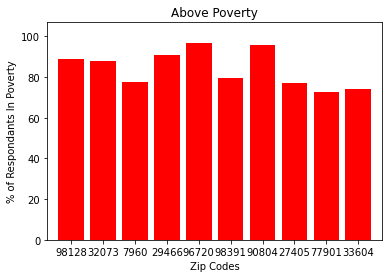

In [25]:
plt.bar(x_axis, In_Poverty, color="r", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, University)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(In_Poverty)+10)
plt.title("Above Poverty")
plt.xlabel("Zip Codes")
plt.ylabel("% of Respondants In Poverty")

In [22]:
University = ["98128", "32073", "7960", "29466", "96720", "98391", "90804", "27405", "77901", "33604"]
In_Poverty = [10.51, 10.36, 6.92, 2.62, 15.91, 4.10, 19.65, 26.79, 23.16, 22.01]
x_axis = np.arange(len(In_Poverty))

Text(0, 0.5, '% of Respondants In Poverty')

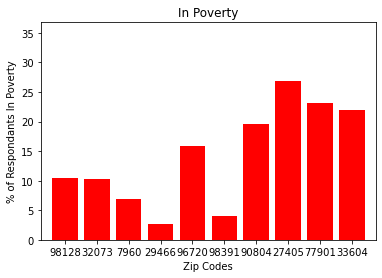

In [23]:
plt.bar(x_axis, In_Poverty, color="r", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, University)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(In_Poverty)+10)
plt.title("In Poverty")
plt.xlabel("Zip Codes")
plt.ylabel("% of Respondants In Poverty")